In [2]:
!dir

 Volume in drive D is Samip
 Volume Serial Number is 3A4B-753D

 Directory of d:\TessTutorial

09/03/2024  04:05 PM    <DIR>          .
08/29/2024  07:15 PM    <DIR>          datagentest
08/30/2024  09:24 PM             1,024 groundtruth.py
05/13/2024  03:07 PM           189,856 notice.jpg
08/29/2024  10:56 AM           642,324 NotoSansDevanagari-VariableFont_wdth,wght.ttf
09/02/2024  10:59 PM            41,071 ocrtest.ipynb
09/03/2024  04:05 PM            43,272 output.png
08/29/2024  09:40 PM            72,040 Ramadan-Notice.jpg
08/31/2024  01:09 PM             2,274 skew.ipynb
09/02/2024  07:32 PM    <DIR>          tesseract_tutorial
09/01/2024  04:25 PM           150,440 test.pdf
08/29/2024  07:08 PM    <DIR>          test_images
09/03/2024  05:01 PM            52,862 train.ipynb
08/29/2024  12:34 PM               145 train.txt
              10 File(s)      1,195,308 bytes
               4 Dir(s)   3,338,874,880 bytes free


In [3]:
#switch to  tesstrain
%cd tesseract_tutorial/tesstrain
!dir

d:\TessTutorial\tesseract_tutorial\tesstrain
 Volume in drive D is Samip
 Volume Serial Number is 3A4B-753D

 Directory of d:\TessTutorial\tesseract_tutorial\tesstrain

09/03/2024  02:12 PM    <DIR>          .
09/02/2024  07:32 PM    <DIR>          ..
08/29/2024  11:20 AM    <DIR>          .github
08/29/2024  11:20 AM                28 .gitignore
08/29/2024  11:20 AM               264 .pylintrc
08/29/2024  11:20 AM             1,634 count_chars.py
09/03/2024  01:29 PM    <DIR>          data
08/29/2024  11:20 AM             1,068 generate_eval_train.py
08/29/2024  11:20 AM             1,095 generate_gt_from_box.py
08/29/2024  11:20 AM             1,527 generate_line_box.py
08/29/2024  11:20 AM             2,336 generate_line_syllable_box.py
08/29/2024  11:20 AM             1,316 generate_wordstr_box.py
08/29/2024  11:20 AM            10,349 LICENSE
09/03/2024  02:51 PM            17,852 Makefile
09/03/2024  01:55 PM                90 nep-new_2.450_1198_4900.log
08/29/2024  11:20 AM     

## FINE TUNING THE MODEL

Training is done through bash command

In [18]:
import os
import subprocess

# Step 1: Set environment variables
os.environ['TESSDATA_PREFIX'] = r'..\tesseract\tessdata'
os.environ['GROUND_TRUTH_DIR'] = r'..\data\nep-new-ground-truth'

# Step 2: Prepend the desired directory to the PATH environment variable
git_bin_path = r'C:\Program Files\Git\usr\bin'
os.environ['PATH'] = git_bin_path + os.pathsep + os.environ['PATH']

# Step 3: Change the working directory to where the ground truth files are located
os.chdir(r'..\data\nep-new-ground-truth')

# Debug: Print the current working directory and list of files
print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir())

# Step 4: Verify the presence of ground truth files
ground_truth_files = [f for f in os.listdir() if f.endswith('.gt.txt')]
if not ground_truth_files:
    raise FileNotFoundError("No ground truth files (*.gt.txt) found in the directory.")

# Step 5: Change the working directory to the tesstrain folder
os.chdir(r'..\..\tesstrain')

# Step 6: Define the command
command = [
    'make', 'training',
    'MODEL_NAME=nep-new',
    'START_MODEL=nep',
    'TESSDATA=../tesseract/tessdata',
    'LEARNING_RATE=0.002',
    'LANG_TYPE=Indic',
    'FINTE_TUNE_TYPE=Impact',
    'MAX_ITERATIONS=5000 &',
    'make plot MODEL_NAME=nep-new'
]

# Step 7: Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Step 8: Print the output line by line
for line in process.stdout:
    print(line, end='')

# Step 9: Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")

Current working directory: d:\TessTutorial\tesseract_tutorial\data\nep-new-ground-truth
Files in the current directory: ['1.gt.txt', '1.png', '10.gt.txt', '10.png', '100.gt.txt', '100.png', '101.gt.txt', '101.png', '103.gt.txt', '103.png', '104.gt.txt', '104.png', '105.gt.txt', '105.png', '106.gt.txt', '106.png', '108.gt.txt', '108.png', '109.gt.txt', '109.png', '11.gt.txt', '11.png', '110.gt.txt', '110.png', '111.gt.txt', '111.png', '112.gt.txt', '112.png', '114.gt.txt', '114.png', '115.gt.txt', '115.png', '116.gt.txt', '116.png', '117.gt.txt', '117.png', '118.gt.txt', '118.png', '119.gt.txt', '119.png', '12.gt.txt', '12.png', '120.gt.txt', '120.png', '122.gt.txt', '122.png', '123.gt.txt', '123.png', '124.gt.txt', '124.png', '125.gt.txt', '125.png', '127.gt.txt', '127.png', '128.gt.txt', '128.png', '13.gt.txt', '13.png', '130.gt.txt', '130.png', '131.gt.txt', '131.png', '132.gt.txt', '132.png', '133.gt.txt', '133.png', '134.gt.txt', '134.png', '135.gt.txt', '135.png', '136.gt.txt', '1

In [16]:
# import subprocess

# # Define the command to be executed with the LOG_FILE parameter
# log_file_path = 'data/nep-new/training.log'  # Specify the path to the log file
# command = ['make', 'evaluation', 'MODEL_NAME=nep-new','--debug=all']

# # Run the command and print output in real-time
# process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# # Print the output line by line
# for line in process.stdout:
#     print(line, end='')

# # Wait for the process to complete and get the return code
# process.wait()
# print(f"Process finished with return code {process.returncode}")

GNU Make 4.4.1
Built for Windows32
Copyright (C) 1988-2023 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <https://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.
find_and_set_shell() path search set default_shell = C:/Program Files/Git/usr/bin/sh.exe
Reading makefiles...
Reading makefile 'Makefile'...
You are using make version: 4.4.1
CreateProcess(C:\Program Files\Git\usr\bin\find.exe,find -L data/nep-new-ground-truth -name *.gt.txt,...)
Main thread handle = 00000164
CreateProcess(C:\Program Files\Git\usr\bin\find.exe,find -L data/nep-new-ground-truth -name *.gt.txt,...)
Updating makefiles....
 Considering target file 'Makefile'.
  Looking for an implicit rule for 'Makefile'.
  No implicit rule found for 'Makefile'.
 Finished prerequisites of target file 'Makefile'.
 No need to remake target 'Makefile'.
Updating goal targets....
Considering target file 'evalu

### Training and Testing Error Plot

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [5]:
def read_training_error(log_file):
    iterations = []
    errors = []
    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(r'At iteration \d+/\d+/(\d+), .* BCER train=([\d.]+)%', line)
            if match:
                iterations.append(int(match.group(1)))
                errors.append(float(match.group(2)))
    return pd.DataFrame({'Iteration': iterations, 'Training Error': errors})

In [6]:
def read_testing_error(log_folder):
    iterations = []
    errors = []
    for log_file in os.listdir(log_folder):
        if log_file.endswith('.eval.log'):
            iteration = int(re.search(r'_(\d+)\.eval\.log', log_file).group(1))
            with open(os.path.join(log_folder, log_file), 'r') as file:
                for line in file:
                    match = re.search(r'BCER eval=([\d.]+)', line)
                    if match:
                        iterations.append(iteration)
                        errors.append(float(match.group(1)))
                        break
    return pd.DataFrame({'Iteration': iterations, 'Testing Error': errors})

In [7]:
training_error = read_training_error('data/nep-new/training.log')
training_error

,Iteration,Training Error
0,100,21.053
1,200,19.648
2,300,17.654
3,400,16.953
4,500,15.971
5,600,15.453
6,700,14.672
7,800,13.844
8,900,13.228
9,1000,12.609


In [10]:
testing_error= read_testing_error('data/nep-new/eval')
testing_error.sort_values(by='Iteration', inplace=True)
testing_error.reset_index(drop=True, inplace=True)
testing_error

,Iteration,Testing Error
0,100,18.276
1,200,16.701
2,300,15.549
3,400,16.268
4,500,17.132
5,600,17.024
6,700,17.735
7,800,16.603
8,900,17.981
9,1000,17.413


In [11]:
data = pd.merge(training_error, testing_error, on='Iteration', how='inner').sort_values(by='Iteration')
data

,Iteration,Training Error,Testing Error
0,100,21.053,18.276
1,200,19.648,16.701
2,300,17.654,15.549
3,400,16.953,16.268
4,500,15.971,17.132
5,600,15.453,17.024
6,700,14.672,17.735
7,800,13.844,16.603
8,900,13.228,17.981
9,1000,12.609,17.413


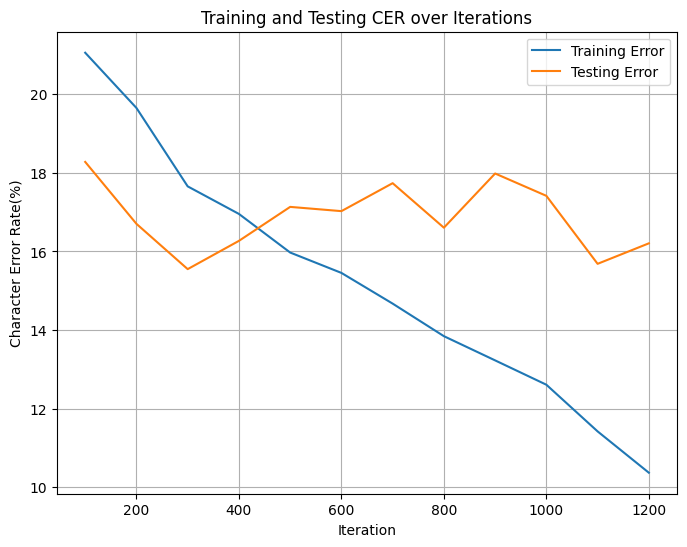

In [14]:
# Filter data to include only the first 1500 iterations
filtered_data = data[data['Iteration'] <= 1500]

plt.figure(figsize=(8, 6))
plt.plot(filtered_data['Iteration'], filtered_data['Training Error'], label='Training Error')
plt.plot(filtered_data['Iteration'], filtered_data['Testing Error'], label='Testing Error')
plt.xlabel('Iteration')
plt.ylabel('Character Error Rate(%)')
plt.title('Training and Testing CER over Iterations')
plt.legend()
plt.grid(True)
plt.show()